# JULIUS CALVIN SAPUTRA (00000068626) UAS DATA ANALIST

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
avocado = pd.read_csv("avocado-updated-2020.csv")
avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [3]:
avocado.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


In [4]:
avocado.shape

(33045, 13)

In [5]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [6]:
avocado.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [7]:
avocado.columns = ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
                   'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
                   'type', 'year', 'region']
avocado.head()
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          33045 non-null  object 
 1   AveragePrice  33045 non-null  float64
 2   Total Volume  33045 non-null  float64
 3   4046          33045 non-null  float64
 4   4225          33045 non-null  float64
 5   4770          33045 non-null  float64
 6   Total Bags    33045 non-null  float64
 7   Small Bags    33045 non-null  float64
 8   Large Bags    33045 non-null  float64
 9   XLarge Bags   33045 non-null  float64
 10  type          33045 non-null  object 
 11  year          33045 non-null  int64  
 12  region        33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


# Missing Data

In [8]:
avocado.dropna()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


Jumlah Data Sebelum Menghilangkan Outlier: 33045


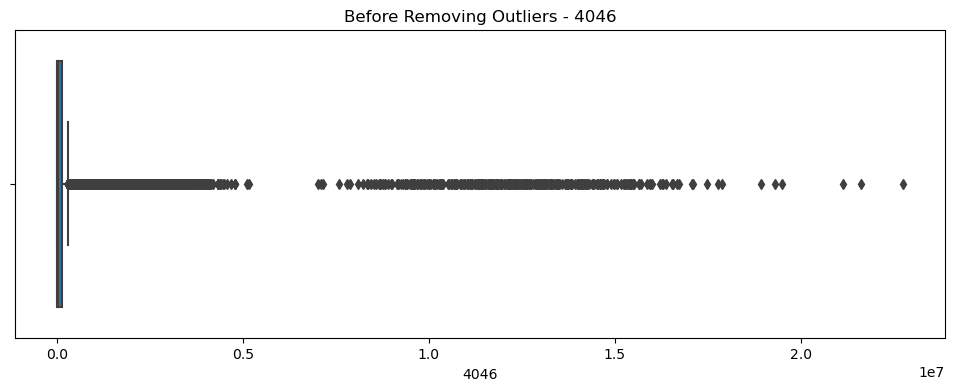


Jumlah Data Setelah Menghilangkan Outlier: 28405


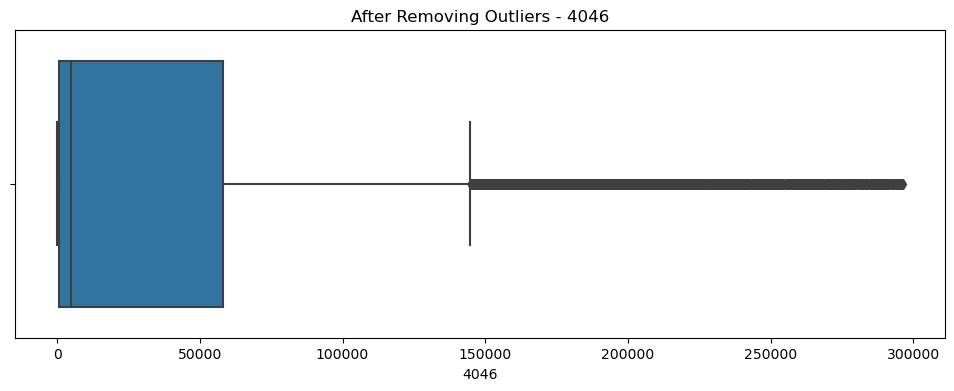

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
print("Jumlah Data Sebelum Menghilangkan Outlier:", len(avocado))
plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['4046'])
plt.title('Before Removing Outliers - 4046')
plt.show()
Q1 = avocado['4046'].quantile(0.25)
Q3 = avocado['4046'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
avocado = avocado[(avocado['4046'] >= lower_bound) & (avocado['4046'] <= upper_bound)]
print("\nJumlah Data Setelah Menghilangkan Outlier:", len(avocado))
plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['4046'])
plt.title('After Removing Outliers - 4046')
plt.show()

Jumlah Data Sebelum Menghilangkan Outlier: 28405


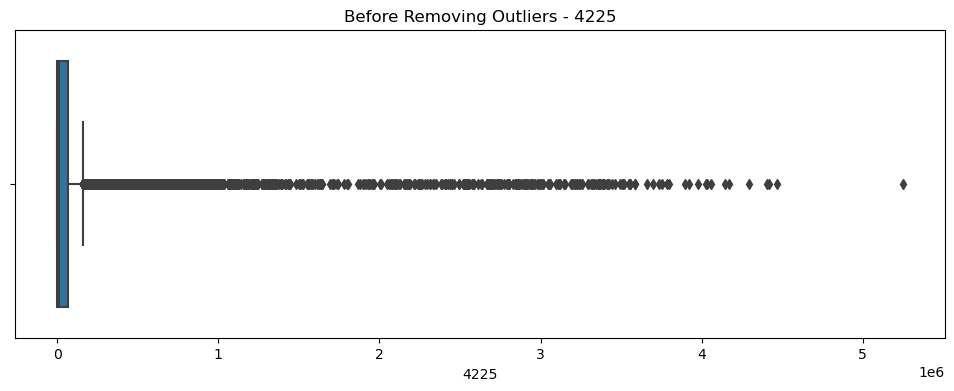


Jumlah Data Setelah Menghilangkan Outlier: 24460


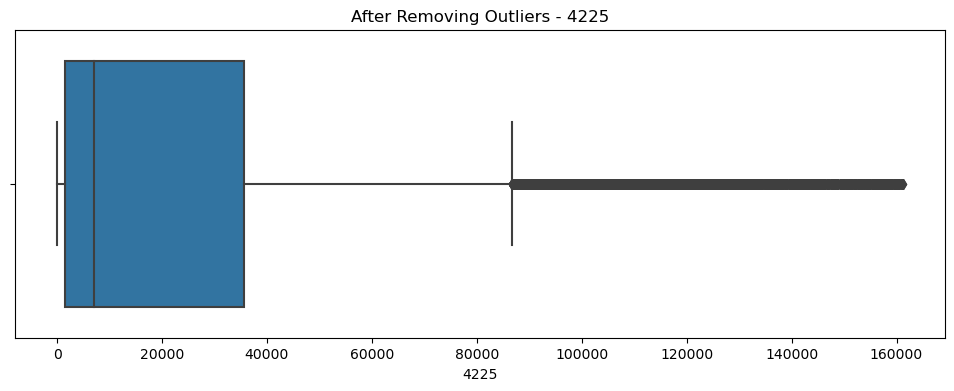

In [10]:
print("Jumlah Data Sebelum Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['4225'])
plt.title('Before Removing Outliers - 4225')
plt.show()

Q1 = avocado['4225'].quantile(0.25)
Q3 = avocado['4225'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

avocado = avocado[(avocado['4225'] >= lower_bound) & (avocado['4225'] <= upper_bound)]

print("\nJumlah Data Setelah Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['4225'])
plt.title('After Removing Outliers - 4225')
plt.show()

Jumlah Data Sebelum Menghilangkan Outlier: 24460


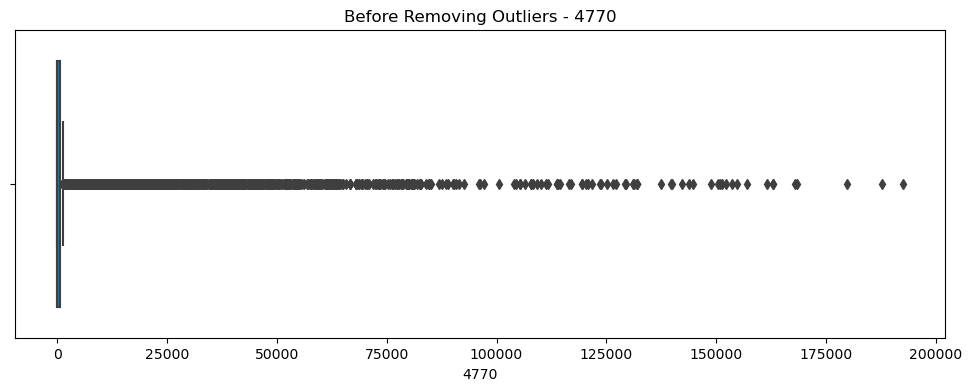


Jumlah Data Setelah Menghilangkan Outlier: 19823


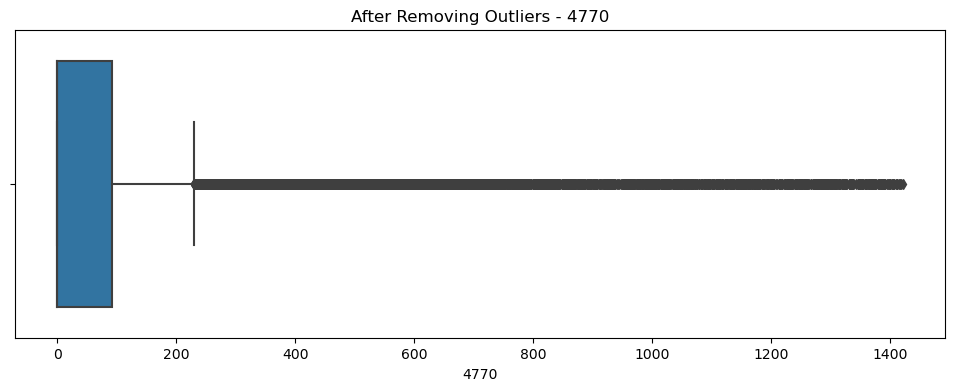

In [11]:
print("Jumlah Data Sebelum Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['4770'])
plt.title('Before Removing Outliers - 4770')
plt.show()

Q1 = avocado['4770'].quantile(0.25)
Q3 = avocado['4770'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

avocado = avocado[(avocado['4770'] >= lower_bound) & (avocado['4770'] <= upper_bound)]

print("\nJumlah Data Setelah Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['4770'])
plt.title('After Removing Outliers - 4770')
plt.show()

Jumlah Data Sebelum Menghilangkan Outlier: 19823


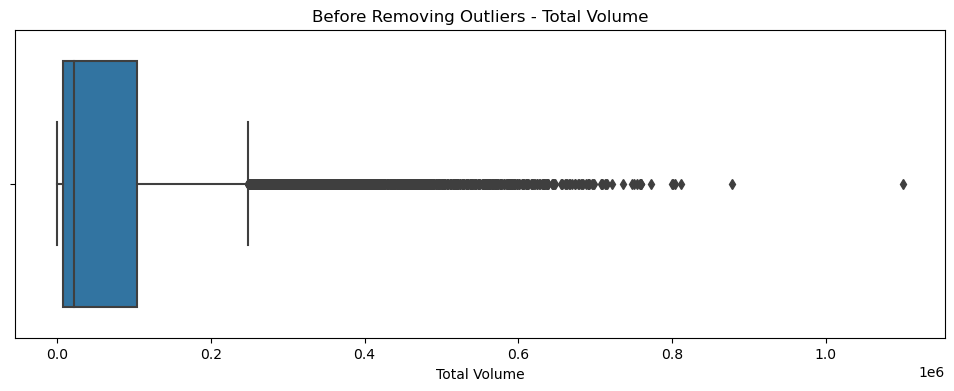


Jumlah Data Setelah Menghilangkan Outlier: 18064


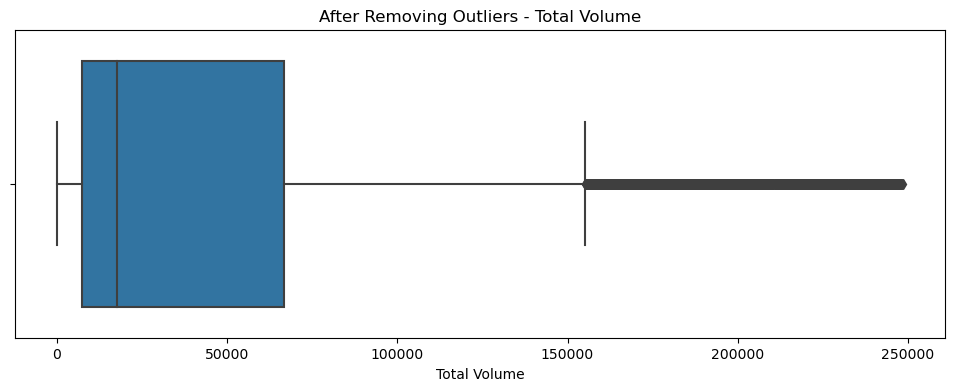

In [12]:
print("Jumlah Data Sebelum Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['Total Volume'])
plt.title('Before Removing Outliers - Total Volume')
plt.show()

Q1 = avocado['Total Volume'].quantile(0.25)
Q3 = avocado['Total Volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

avocado = avocado[(avocado['Total Volume'] >= lower_bound) & (avocado['Total Volume'] <= upper_bound)]

print("\nJumlah Data Setelah Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['Total Volume'])
plt.title('After Removing Outliers - Total Volume')
plt.show()

Jumlah Data Sebelum Menghilangkan Outlier: 18064


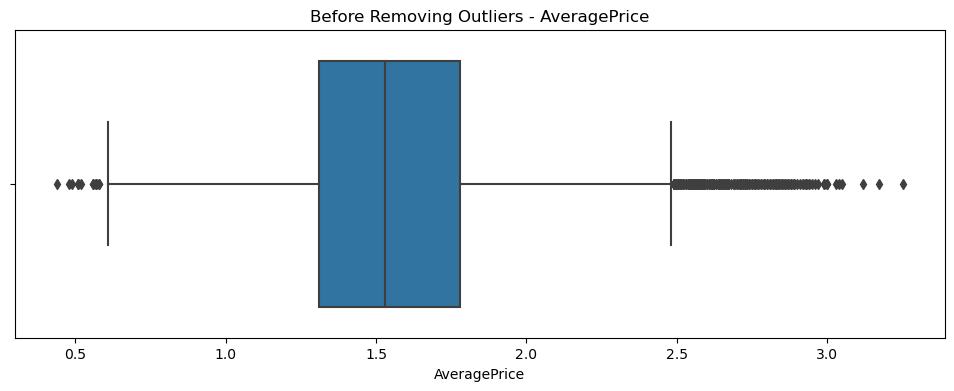


Jumlah Data Setelah Menghilangkan Outlier: 17801


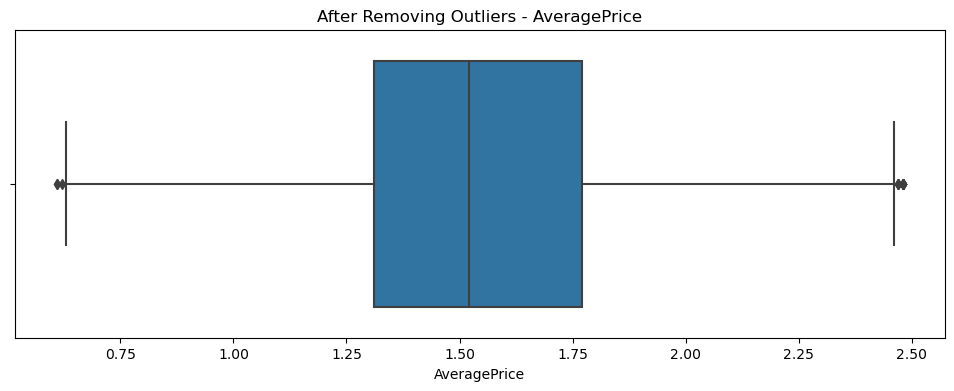

In [13]:
print("Jumlah Data Sebelum Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['AveragePrice'])
plt.title('Before Removing Outliers - AveragePrice')
plt.show()

Q1 = avocado['AveragePrice'].quantile(0.25)
Q3 = avocado['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

avocado = avocado[(avocado['AveragePrice'] >= lower_bound) & (avocado['AveragePrice'] <= upper_bound)]

print("\nJumlah Data Setelah Menghilangkan Outlier:", len(avocado))

plt.figure(figsize=(12, 4))
sns.boxplot(x=avocado['AveragePrice'])
plt.title('After Removing Outliers - AveragePrice')
plt.show()

# FORMATING

In [14]:
avocado['Date'] = pd.to_datetime(avocado['Date'])
datavis = avocado[['AveragePrice', 'Date']]
datavis['Date']= pd.to_datetime(datavis['Date'], infer_datetime_format=True)
print(datavis.dtypes)

AveragePrice           float64
Date            datetime64[ns]
dtype: object


C:\Users\calvi\AppData\Local\Temp\ipykernel_13824\2872335283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datavis['Date']= pd.to_datetime(datavis['Date'], infer_datetime_format=True)


In [15]:
#Normalisasion
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
avocado['AveragePrice'] = scaler.fit_transform(avocado['AveragePrice'].values.reshape(-1, 1))
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,0.326203,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,0.631016,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
3,2015-01-04,0.614973,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
5,2015-01-04,0.363636,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
7,2015-01-04,0.550802,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [16]:
#Encoding
avocado['type'] = avocado['type'].replace({'conventional': 1, 'organic': 2})
print(avocado)

            Date  AveragePrice  Total Volume      4046      4225    4770  \
0     2015-01-04      0.326203      40873.28   2819.50  28287.42   49.90   
1     2015-01-04      0.631016       1373.95     57.42    153.88    0.00   
3     2015-01-04      0.614973       3846.69   1500.15    938.35    0.00   
5     2015-01-04      0.363636      19137.28   8040.64   6557.47  657.48   
7     2015-01-04      0.550802       1505.12      1.27   1129.50    0.00   
...          ...           ...           ...       ...       ...     ...   
33033 2020-11-29      0.117647     189187.58  78597.67   9497.22   65.16   
33034 2020-11-29      0.657754       5898.33    677.71    912.70    0.00   
33035 2020-11-29      0.181818      72128.91   6789.51  31201.09  627.87   
33036 2020-11-29      0.454545       3191.59    166.36     89.78    0.00   
33038 2020-11-29      0.181818      11883.88    101.71      0.00    0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
0         9716.46

In [17]:
#Bining
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = ['Very Low', 'Low', 'Average', 'High', 'Very High']

avocado['Price Level'] = pd.cut(avocado['AveragePrice'], bins=bin_edges, labels=bin_labels, include_lowest=True)

avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Price Level
0,2015-01-04,0.326203,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,1,2015,Albany,Low
1,2015-01-04,0.631016,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,2,2015,Albany,High
3,2015-01-04,0.614973,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,2,2015,Atlanta,High
5,2015-01-04,0.363636,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,2,2015,Baltimore/Washington,Low
7,2015-01-04,0.550802,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,2,2015,Boise,Average


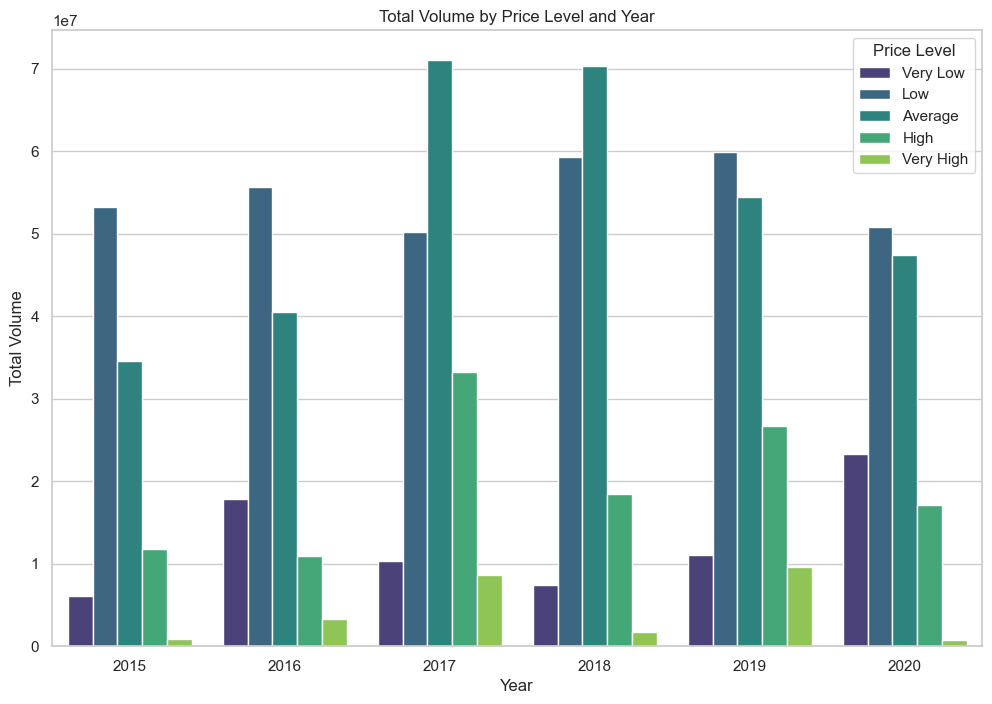

In [18]:
#grouping
total_volume_by_price_year = avocado.groupby(['Price Level', 'year'])['Total Volume'].sum().reset_index()
total_volume_by_price_year.head()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='Total Volume', hue='Price Level', data=total_volume_by_price_year, palette='viridis')

plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.title('Total Volume by Price Level and Year')

plt.show()

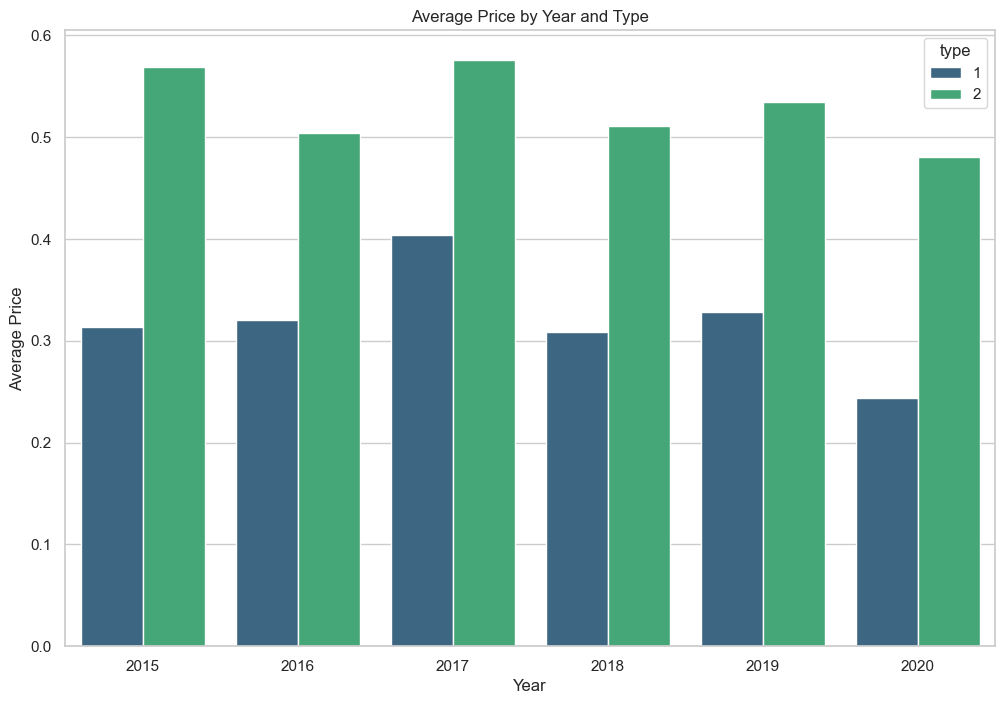

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
AveragePrices_by_year_type = avocado.groupby(['year', 'type'])['AveragePrice'].mean().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='AveragePrice', hue='type', data=AveragePrices_by_year_type, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Year and Type')
plt.show()


In [20]:
print(datavis.describe().T)
print('AveragePrice')
print(datavis.describe().T.round(2))

                count      mean       std   min   25%   50%   75%   max
AveragePrice  17801.0  1.543478  0.333942  0.61  1.31  1.52  1.77  2.48
AveragePrice
                count  mean   std   min   25%   50%   75%   max
AveragePrice  17801.0  1.54  0.33  0.61  1.31  1.52  1.77  2.48


# Distribution

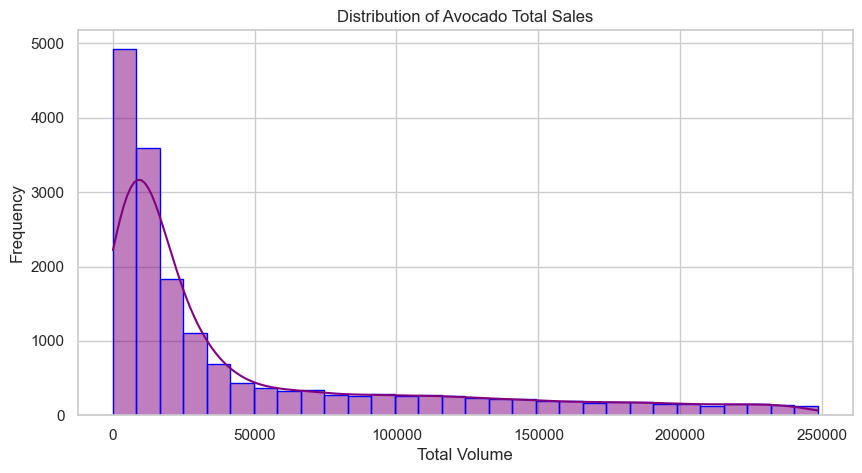

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(avocado['Total Volume'], color='purple', bins = 30, kde= True, edgecolor='blue')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Avocado Total Sales')
plt.show()

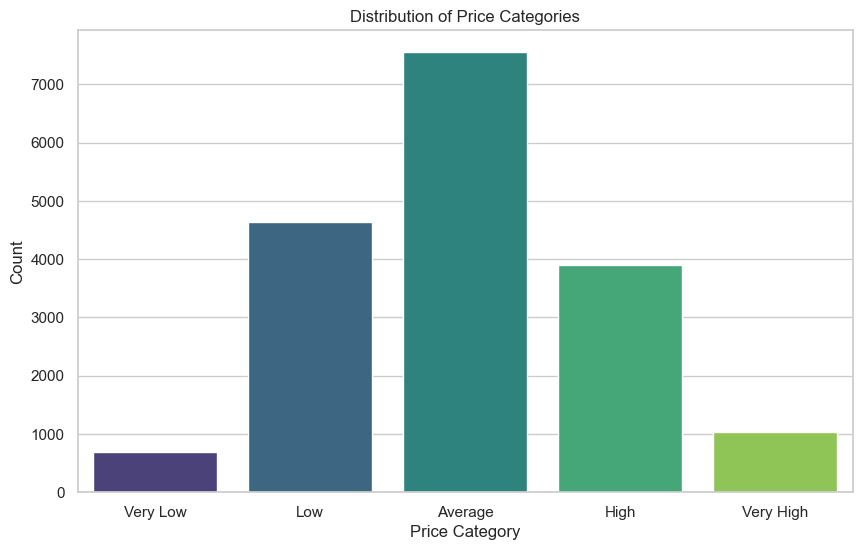

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Level', data=avocado, palette='viridis')

plt.xlabel('Price Category')
plt.ylabel('Count')
plt.title('Distribution of Price Categories')

plt.show()

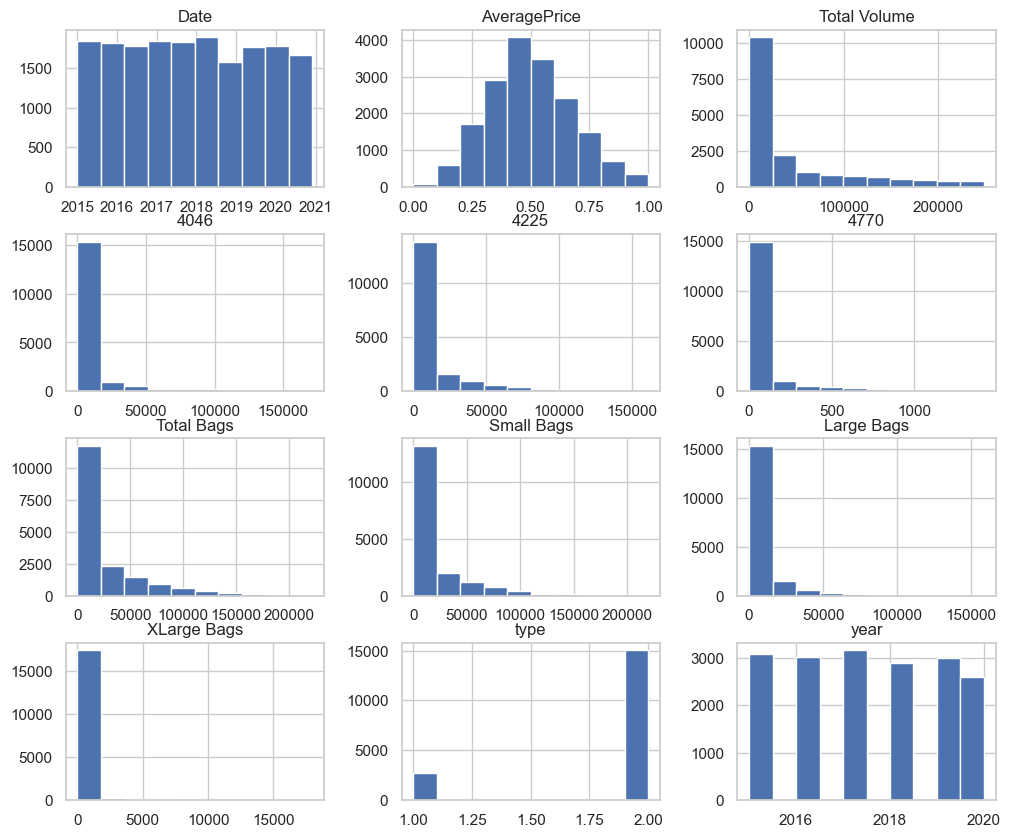

In [23]:
avocado.hist(figsize=(12, 10))
plt.show()

# COMPOSITION

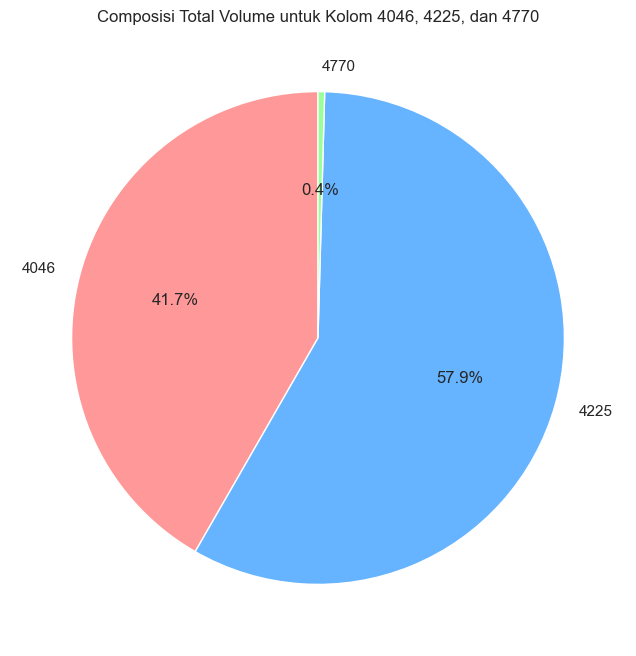

In [24]:

total_4046 = avocado['4046'].sum()
total_4225 = avocado['4225'].sum()
total_4770 = avocado['4770'].sum()

labels = ['4046', '4225', '4770']
sizes = [total_4046, total_4225, total_4770]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Composisi Total Volume untuk Kolom 4046, 4225, dan 4770')
plt.show()


# Relasi


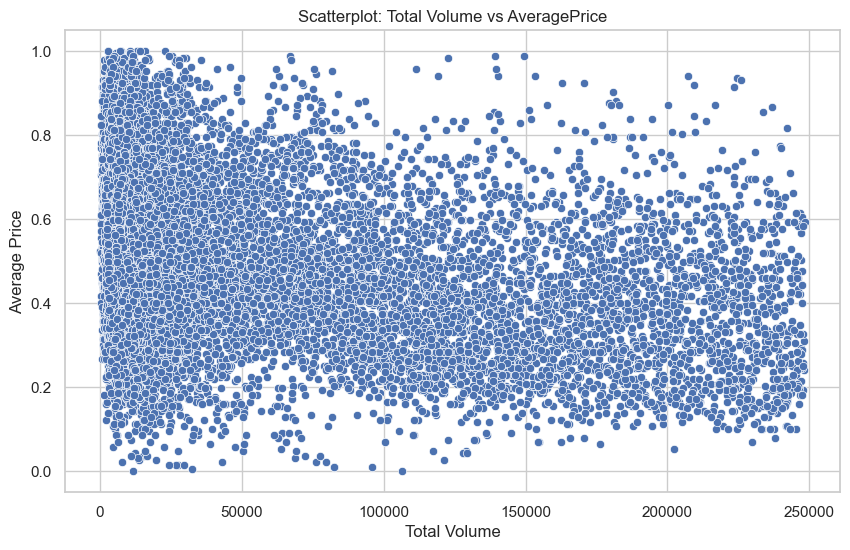

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=avocado)
plt.title('Scatterplot: Total Volume vs AveragePrice')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

# Permbandingan

C:\Users\calvi\AppData\Local\Temp\ipykernel_13824\375233967.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='Total Volume', data=avocado, ci=None)


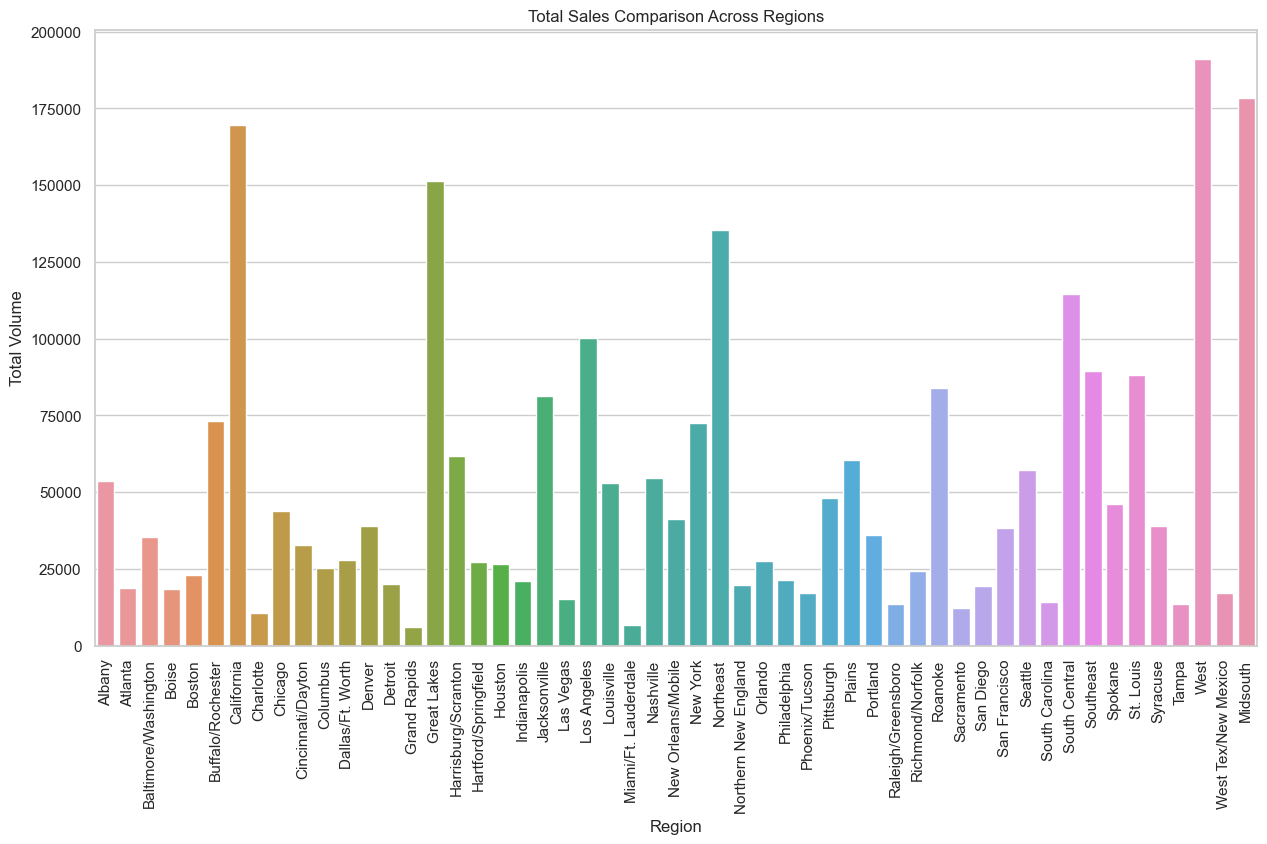

In [26]:
plt.figure(figsize=(15, 8))
sns.barplot(x='region', y='Total Volume', data=avocado, ci=None)
plt.title('Total Sales Comparison Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='type', ylabel='count'>

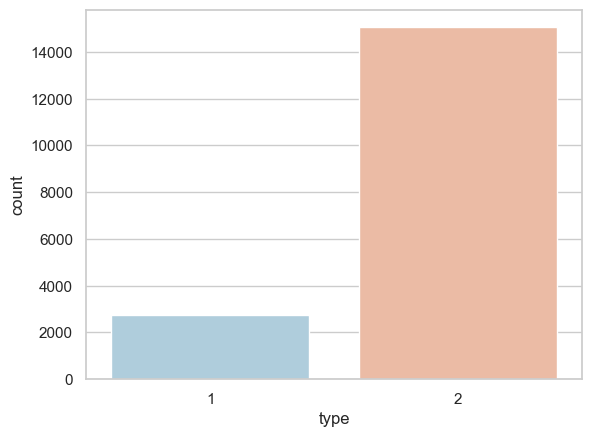

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='type',data=avocado,palette='RdBu_r')

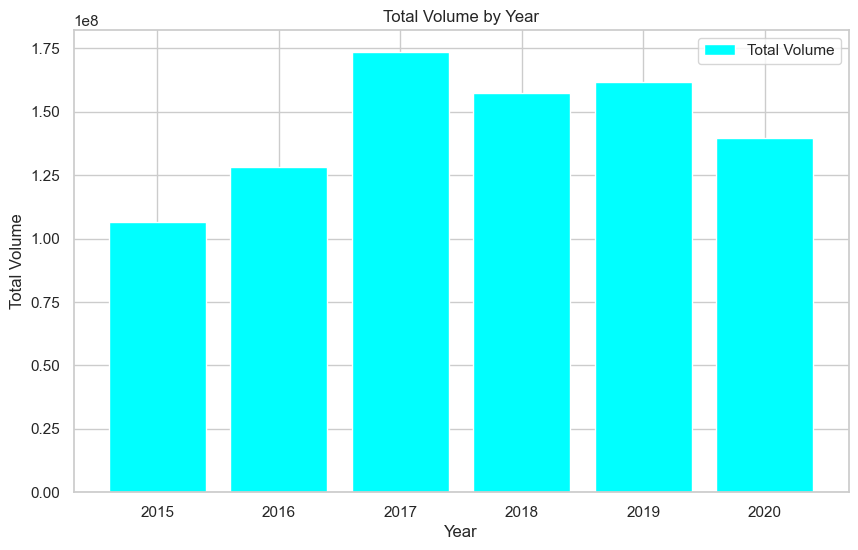

In [28]:

grouped_data = avocado.groupby('year').agg({'Total Volume': 'sum', 'AveragePrice': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(grouped_data['year'], grouped_data['Total Volume'], label='Total Volume', color='cyan')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Volume')
ax1.set_title('Total Volume by Year')
ax1.legend()
plt.show()


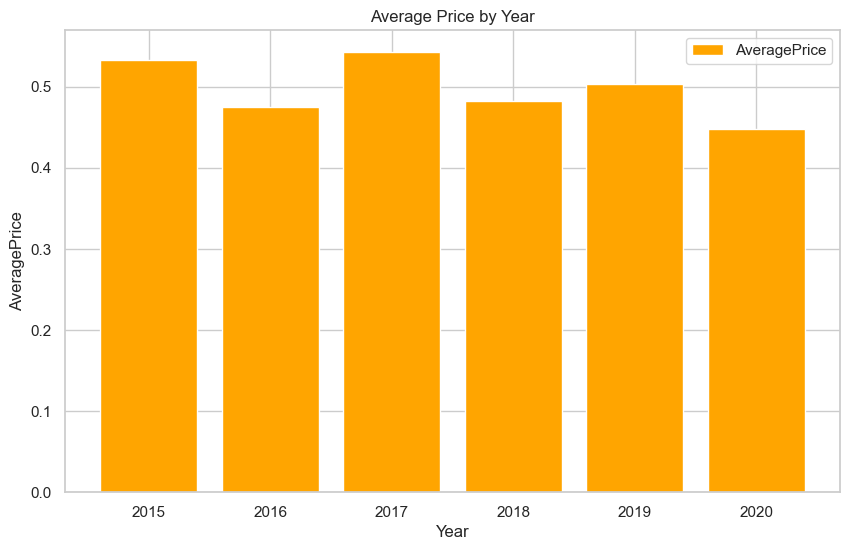

In [29]:
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.bar(grouped_data['year'], grouped_data['AveragePrice'], label='AveragePrice', color='orange')
ax2.set_xlabel('Year')
ax2.set_ylabel('AveragePrice')
ax2.set_title('Average Price by Year')
ax2.legend()
plt.show()

# MODELING

C:\Users\calvi\AppData\Local\Temp\ipykernel_13824\2865185953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_columns.corr()


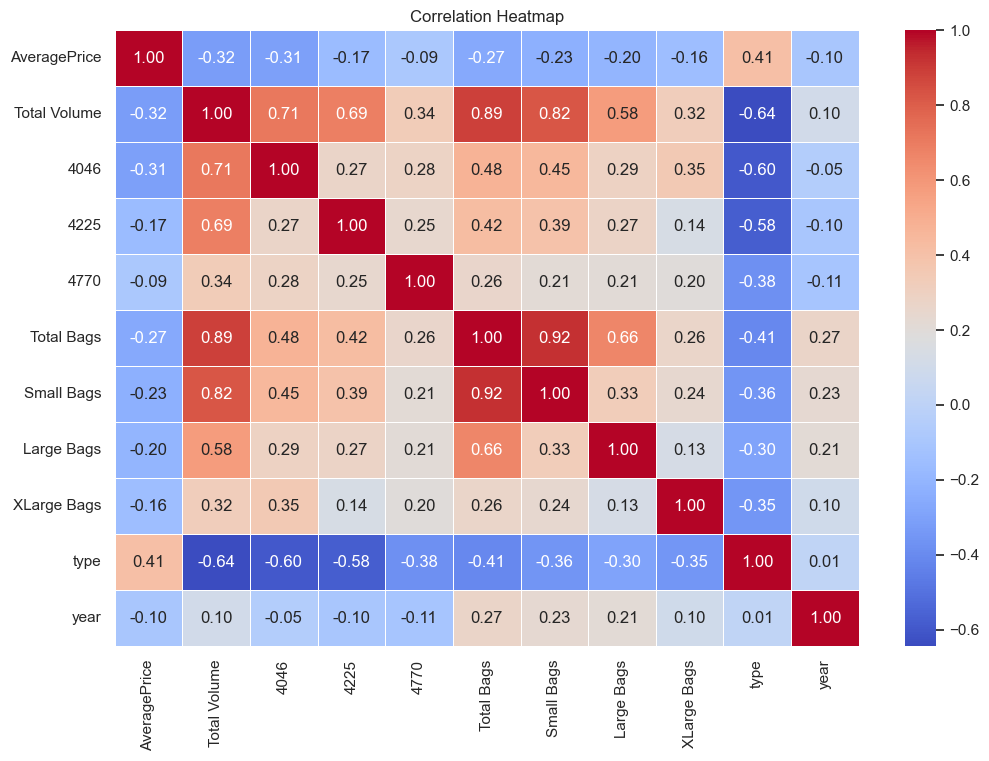

In [30]:
numerical_columns = avocado.drop(['Date', 'region'], axis=1)
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MULTIPLE REGREESION

In [31]:
X = avocado[['AveragePrice', '4046', '4225', '4770', 'type', 'year']]
y = avocado['Total Volume']
y = y.values.reshape(-1, 1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(14240, 6) (3561, 6)
(14240, 1) (3561, 1)


In [32]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [[-0.0498538   0.57374552  0.56741675  0.07202317  0.0703294   0.19089092]]
Intercept:  [-0.00224199]


In [33]:
y_pred = model.predict(X_test)
print('Predicted: ', y_pred)

Predicted:  [[-0.25308275]
 [ 1.75275325]
 [-0.13618126]
 ...
 [-0.18343706]
 [ 0.90383144]
 [-0.6384793 ]]


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae_multi = mean_absolute_error(y_test, y_pred)
mse_multi = mean_squared_error(y_test, y_pred)
r2_multi = r2_score(y_test, y_pred)

print("Mean Absolute Error: %.2f" % mae_multi)
print("Mean Squared Error: %.2f" % mse_multi)
print("R-squared:", r2_multi)


Mean Absolute Error: 0.26
Mean Squared Error: 0.18
R-squared: 0.8143322822814907


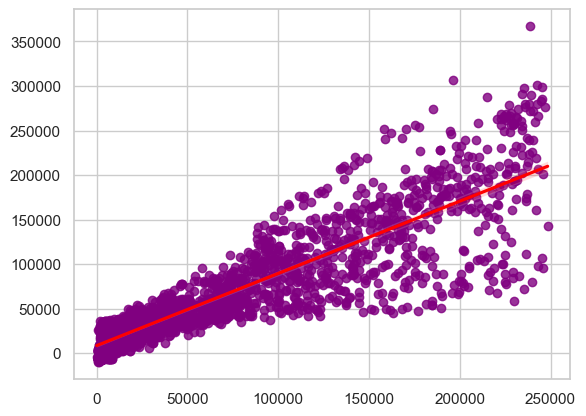

In [35]:
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1,1))
line_color = 'red'
ax = sns.regplot(x=y_test_inverse, y=y_pred_inverse, scatter_kws={'color': 'purple'}, line_kws={'color': line_color})
plt.show()

# Polinomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures 
polynomial = PolynomialFeatures(degree = 5)
polynomial_train_x = polynomial.fit_transform(X_train)
polynomial_train_x

array([[ 1.00000000e+00, -2.20037988e-01, -4.08157893e-01, ...,
         7.37971516e-03,  5.94909850e-03,  4.79581829e-03],
       [ 1.00000000e+00, -3.39822579e-01, -3.66322668e-01, ...,
        -8.54353852e-02, -9.08765886e-03, -9.66643310e-04],
       [ 1.00000000e+00,  7.38238737e-01, -3.69670424e-01, ...,
        -5.38093150e-01,  1.81220912e+00, -6.10322190e+00],
       ...,
       [ 1.00000000e+00, -1.89702226e+00, -3.94808610e-01, ...,
        -1.08768131e-01,  2.14981249e-01, -4.24912491e-01],
       [ 1.00000000e+00, -5.49445612e-01,  3.23026388e+00, ...,
        -1.62859662e+01, -9.96979766e+00, -6.10322190e+00],
       [ 1.00000000e+00,  1.51683858e+00, -4.16894514e-01, ...,
         6.51103994e-01,  2.33667784e+00,  8.38585445e+00]])

In [37]:
from sklearn.linear_model import LinearRegression
polynomial = PolynomialFeatures(degree=5)
polynomial_train_x = polynomial.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(polynomial_train_x, y_train)
intercept = poly_model.intercept_
coefficients = poly_model.coef_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [7669.48358512]
Coefficients: [[-5.30406611e+01 -2.08376686e+02  1.40048492e+03  3.03803045e+02
   2.72024784e+04  1.75346193e+04 -2.43226044e+02 -3.29041351e+01
   2.12325798e+02 -3.94485432e+02  5.39722049e+01 -7.97986418e+02
   1.75818629e+02 -1.73417623e+03 -3.70988252e+01  1.72666321e+02
  -1.25930177e+03  4.06394320e+01  1.54830453e+03 -1.04115544e+03
  -1.48277315e+03  2.95438418e+02  2.52576291e+04 -2.21403762e+04
  -2.60622569e+02  2.35047284e+04  7.41352727e+01 -2.70723334e+03
  -3.61888073e+03 -2.94880992e+02 -2.08254449e+02 -9.46155093e+02
  -3.37481017e+03 -1.71344415e+01  4.33927087e+02 -2.17802011e+00
  -5.90163725e+02 -2.64901531e+03 -5.90170081e+00 -3.87052118e+02
  -1.80978602e+02  2.41386834e+02 -2.21573756e+00 -6.74342040e+02
  -4.03933447e+02  2.46411392e+01 -2.26692961e+03 -3.91516604e+02
  -1.50169166e+02  6.91089258e+03 -2.08760990e+01 -2.60179048e+03
   3.13875492e+03 -3.33246644e+01  1.02755605e+02 -2.64740742e+02
   4.37340998e+02 -1.30261785e+01  

In [38]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Mean Absolute Error: %.2f" % mae_poly)
print("Mean Squared Error: %.2f" % mse_poly)
print("R-squared:", r2_poly)


Mean Absolute Error: 0.22
Mean Squared Error: 0.13
R-squared: 0.8730429776166446


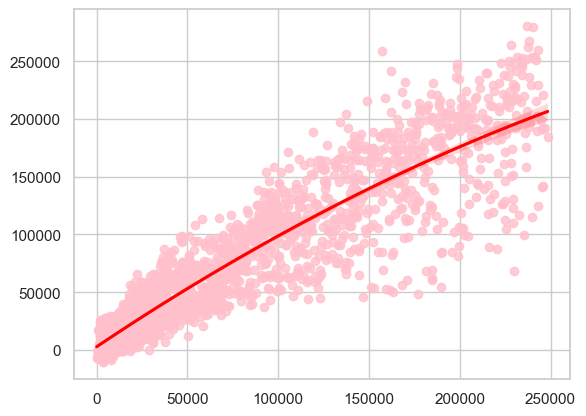

In [39]:
y_test_poly_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_poly_inverse = scaler.inverse_transform(y_pred_poly.reshape(-1,1))
ax = sns.regplot(x=y_test_poly_inverse, y=y_pred_poly_inverse,
                order = 2, scatter_kws = {"color" : "pink"}, line_kws = {"color" : "red"})
plt.show()

# KNN

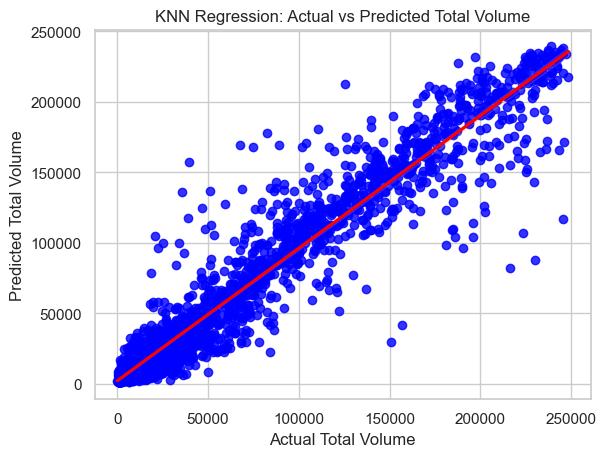

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
X = avocado[['AveragePrice', '4046', '4225', '4770', 'type', 'year']]
y = avocado['Total Volume']
y = y.values.reshape(-1, 1)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)
mae_knn = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse_knn = mean_squared_error(y_test_inverse, y_pred_inverse)
r2_knn = r2_score(y_test_inverse, y_pred_inverse)
line_color = 'red'
ax = sns.regplot(x=y_test_inverse.flatten(), y=y_pred_inverse.flatten(), scatter_kws={'color': 'blue'}, line_kws={'color': line_color})
plt.xlabel('Actual Total Volume')
plt.ylabel('Predicted Total Volume')
plt.title('KNN Regression: Actual vs Predicted Total Volume')
plt.show()


In [45]:
print("Mean Absolute Error: %.2f" % mae_knn)
print("Mean Squared Error: %.2f" % mse_knn)
print("R-squared:", r2_knn)

Mean Absolute Error: 8345.46
Mean Squared Error: 242068419.00
R-squared: 0.9372185099931346


# Evaluasi

In [47]:
print("Mean Absolute Error: %.2f" % mae_multi)
print("Mean Squared Error: %.2f" % mse_multi)
print("R-squared:", r2_multi)

Mean Absolute Error: 0.26
Mean Squared Error: 0.18
R-squared: 0.8143322822814907


In [48]:
print("Mean Absolute Error: %.2f" % mae_poly)
print("Mean Squared Error: %.2f" % mse_poly)
print("R-squared:", r2_poly)

Mean Absolute Error: 0.22
Mean Squared Error: 0.13
R-squared: 0.8730429776166446


In [52]:
print("Mean Absolute Error: %.2f" % mae_knn)
print("Mean Squared Error: %.2f" % mse_knn)
print("R-squared:", r2_knn)

Mean Absolute Error: 8345.46
Mean Squared Error: 242068419.00
R-squared: 0.9372185099931346
